## Helper Functions

In [1]:
from Helper import *
from ground_truth import create_GT_masks
from UV_mapping import create_UV_XYZ_dictionary
from LineMOD import LineMODDataset
from PoseRefinement import *
from Correspondence import *
from Pose_estimation import *
from Test import test
import argparse

# Dataset Download

In [2]:
try:
    os.mkdir("LineMOD_Dataset")
    file1 = open('dataset_install.txt', 'r') 
    Lines = file1.readlines()
    for url in Lines[:-1]:
        zipresp = urlopen(url)
        tempzip = open("tempfile.zip", "wb")
        tempzip.write(zipresp.read())
        tempzip.close()

        zf = ZipFile("tempfile.zip")
        zf.extractall(path = 'LineMOD_Dataset')
        zf.close()
        
    zipresp = urlopen(Lines[-1])
    tempzip = open("tempfile.zip", "wb")
    tempzip.write(zipresp.read())
    tempzip.close()

    zf = ZipFile("tempfile.zip")
    zf.extractall()
    zf.close()
except FileExistsError:
    print("Data set exists")

Data set exists


In [3]:
parser = argparse.ArgumentParser(description='Script to create the Ground Truth masks')
parser.add_argument("--root_dir", default="LineMOD_Dataset/",
                    help="path to dataset directory")

parser.add_argument("--bgd_dir", default="val2017/",
                    help="path to background images dataset directory")
parser.add_argument("--split", default=0.0013, help="train:test split ratio")

args, unknown = parser.parse_known_args()

In [4]:
root_dir = args.root_dir
background_dir = args.bgd_dir

list_all_images = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".jpg"):  # images that exist
            list_all_images.append(os.path.join(root, file))

num_images = len(list_all_images)
indices = list(range(num_images))
np.random.seed(69)
np.random.shuffle(indices)

split = int(np.floor(args.split * num_images))
train_idx, test_idx = indices[:split], indices[split:]
print("Training Samples:", len(train_idx))
print("Testing Samples:", len(test_idx))

save_obj(list_all_images, root_dir + "all_images_adr")
save_obj(train_idx, root_dir + "train_images_indices")
save_obj(test_idx, root_dir + "test_images_indices")

Training Samples: 20
Testing Samples: 15781


In [5]:
classes = {'ape': 1, 
           'benchviseblue': 2, 
           'cam': 3, 
           'can': 4, 
           'cat': 5, 
           'driller': 6,
           'duck': 7, 
           'eggbox': 8, 
           'glue': 9, 
           'holepuncher': 10, 
           'iron': 11, 
           'lamp': 12, 
           'phone': 13}
class_names = list(classes.keys())
dataset_dir_structure(root_dir, class_names)

Directories already exist


In [6]:
fx = 572.41140
px = 325.26110
fy = 573.57043
py = 242.04899
intrinsic_matrix = np.array([[fx, 0, px], [0, fy, py], [0, 0, 1]])

In [7]:
print("------ Start creating ground truth ------")
create_GT_masks(root_dir, background_dir, intrinsic_matrix, classes)
create_UV_XYZ_dictionary(root_dir)  # create UV - XYZ dictionaries
print("----- Finished creating ground truth -----")

------ Start creating ground truth ------
0/20 finished!
----- Finished creating ground truth -----


------ Started training of the correspondence block ------
------ Epoch  1  ---------
Epoch: 1 	Training Loss: 5.823447 	Validation Loss: 4.552884
Validation loss decreased (inf --> 4.552884).  Saving model ...
correspondance_train_loss_history [5.8234474658966064]
correspondance_valid_loss_history [4.552884101867676]


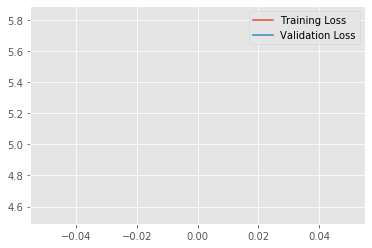

-------------------- Training Finished -------------------


In [8]:
print("------ Started training of the correspondence block ------")
torch.cuda.empty_cache()
train_correspondence_block(root_dir, classes, epochs=1, batch_size=2)
print("-------------------- Training Finished -------------------")

In [9]:
print("------ Started Initial pose estimation ------")
torch.cuda.empty_cache()
initial_pose_estimation(root_dir, classes, intrinsic_matrix)
print("------ Finished Initial pose estimation -----")

------ Started Initial pose estimation ------
0/20 finished!
Number of instances where PnP couldn't be used:  20
------ Finished Initial pose estimation -----


In [10]:
print("----- Started creating inputs for DL based pose refinement ------")
create_refinement_inputs(root_dir, classes, intrinsic_matrix)
print("----- Finished creating inputs for DL based pose refinement -----")

----- Started creating inputs for DL based pose refinement ------
0/20 finished!
Number of outliers:  0
----- Finished creating inputs for DL based pose refinement -----


In [11]:
print("----- Started training DL based pose refiner ------")
train_pose_refinement(root_dir, classes, epochs=1)
print("----- Finished training DL based pose refiner ------")

----- Started training DL based pose refiner ------
----- Epoch Number:  1 --------
torch.Size([2, 512])
torch.Size([2, 512])
torch.Size([2, 512])
torch.Size([2, 512])
torch.Size([2, 512])
torch.Size([2, 512])
torch.Size([2, 512])
torch.Size([2, 512])
torch.Size([2, 512])
torch.Size([2, 512])
Epoch: 1 	Training Loss: 95.222687 	Validation Loss: 94.891594
Validation loss decreased (inf --> 94.891594).  Saving model ...
----- Finished training DL based pose refiner ------


In [12]:
test()

torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1

torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
Average Evaluation Time: 1.0961850290298463
ADD Score for all testing images is:  0.854


TypeError: 'numpy.float64' object is not iterable